# This section presents the implemention and the analysis of the decision tree algorithm. 

## In the first part:
1. we import the necessary libraries and datasets, the Iris dataset. This is a very classic dataset that is often used for classification. It contains the length and width of petals and sepals of three different iris flowers (Setosa, Versicolour, Virginica).
2. we display the first few rows of the dataset and descriptive statistics to understand the basic structure of the dataset. 
3. we visualize the distribution of the target variable by plotting the distribution of the species

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.35

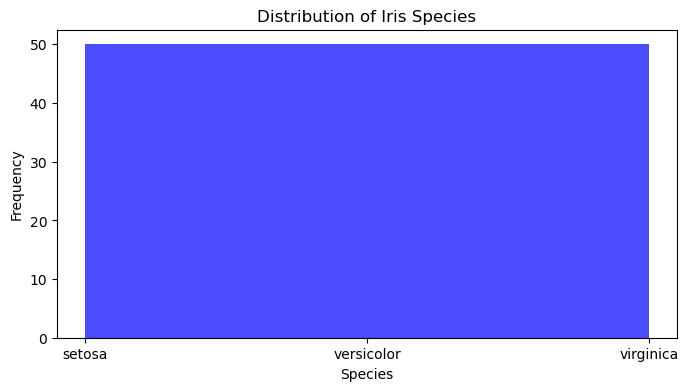

In [7]:
# Import necessary libraries for data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = iris.target

# Show the first few rows of the dataset and descriptive statistics

print(data.head())
print(data.describe())

# Plotting the distribution of the species

plt.figure(figsize=(8, 4))
plt.hist(data['Species'], bins=3, color='blue', alpha=0.7)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show()


## In the second part:

1. we partition the dataset into the features and the target data, the Species.
2. we split the dataset into the training set and the test set.
3. we train a decision tree model on the training set.
4. we show the importance of each feature to help understand how this decision tree works. Besides, it allows us to see which features have the greatest impact on the model’s prediction results.


In [9]:
# Import libraries for Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Select features and target variable
X = data.drop('Species', axis=1)
y = data['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Display the importance of each feature
print("Feature importances:", model.feature_importances_)



Feature importances: [0.         0.01667014 0.90614339 0.07718647]


## In the third part:
1. we use the trained model to make predictions on the test set.
2. we evaluate model performance by showing the hole classification report including accuracy, recall, precison, and F-1 score.
3. we use the confusion matrix to show how the model performs on three different categories. Here, we can observe that all the test data are classified into the correct class.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



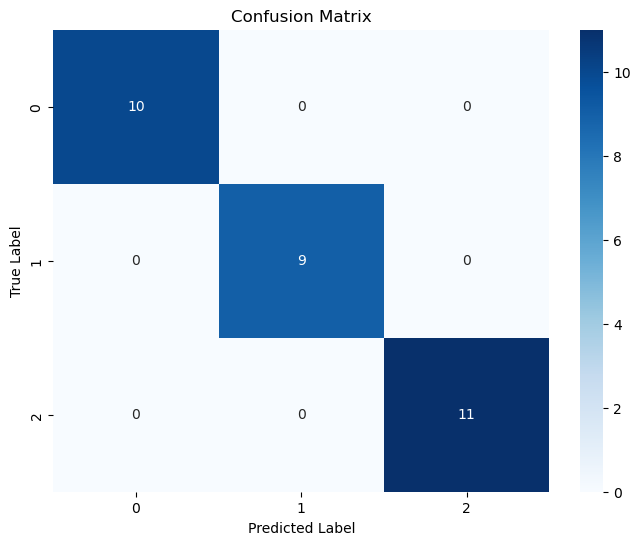

In [10]:
# Import libraries for model evaluation
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



## Analysis part:
1. we further analyze the different implementation. For example, we control the parameter "criterion" to choose different methods such as "gini impurity" and "entropy".
2. we train the model.
3. we use the confusion matrix and classification report to evaluate the model's performance. Here, we can observe both of them can acheive the 100% accuracy. This dataset is too simple to withness the difference between two methods

Feature importances: [0.         0.01667014 0.90614339 0.07718647]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



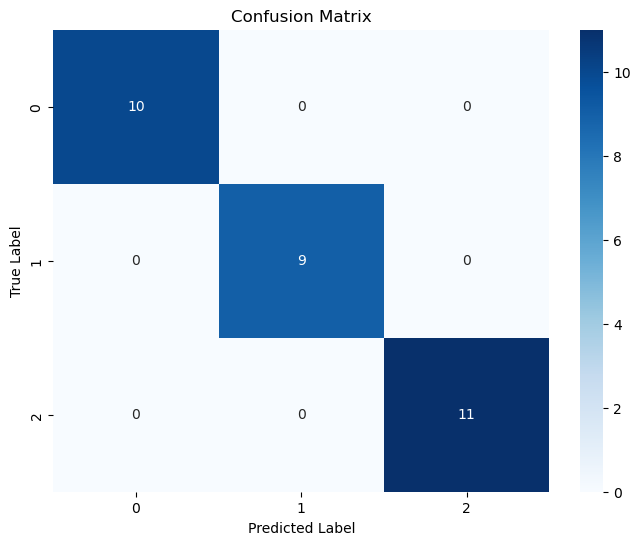

In [12]:
# Import libraries 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = data.drop('Species', axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier model, here we set the criterion parameters to "gini" which employs the gini impurity.
model = DecisionTreeClassifier(random_state=42,criterion="gini")

model.fit(X_train, y_train)

print("Feature importances:", model.feature_importances_)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Feature importances: [0.         0.01448725 0.89540577 0.09010698]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



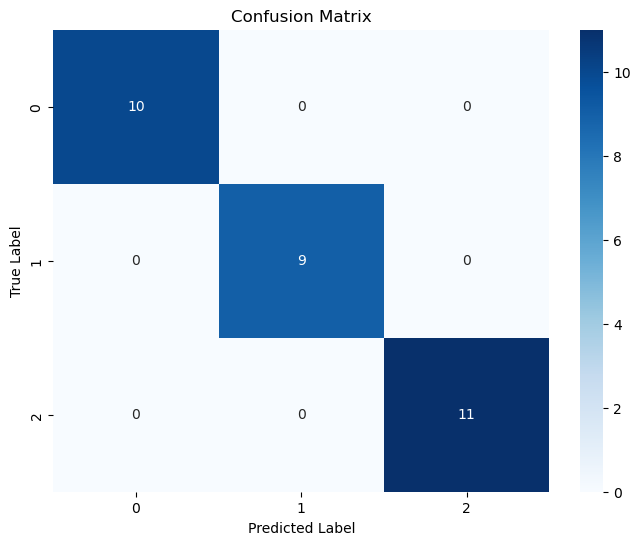

In [13]:
# Import libraries 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = data.drop('Species', axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier model, here we set the criterion parameters to "entropy" which employs the information gain.
model = DecisionTreeClassifier(random_state=42,criterion="entropy")

model.fit(X_train, y_train)

print("Feature importances:", model.feature_importances_)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
